# Importance Rank (Slide Figure)

For the full waveform, heartbeat, and heart rate variability feature categories, what tsfresh extracted features are important?

In [159]:
import json
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [126]:
LEADS = ("I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6")

In [127]:
with open("importances_rank.json", "r") as f:
    importances_rank = json.load(f)

In [146]:
top_1000_important_features = importances_rank["sorted_keys"][:1000]

In [149]:
def get_raw_feat_lead_categories(features):
    df_dict = {
        "Lead": [],
        "Category": [],
        "Feature": [],
    }
    for feature in features:
        splits = feature.split("_")
        if feature in ("age", "sex"):
            # ignore
            continue
        assert splits[0] in LEADS, f"Invalid feature: {feature}"
        lead = splits[0]
        if splits[1] == "hb":
            category = "Heartbeat"
        elif splits[1] == "sig":
            category = "Full Waveform"
        else:
            category = "Heart Rate Variability"
        feature = "_".join(splits[2:])

        df_dict["Lead"].append(lead)
        df_dict["Category"].append(category)
        df_dict["Feature"].append(feature)
    return df_dict

Counter({'Heartbeat': 536, 'Full Waveform': 291, 'Heart Rate Variability': 172}) 999


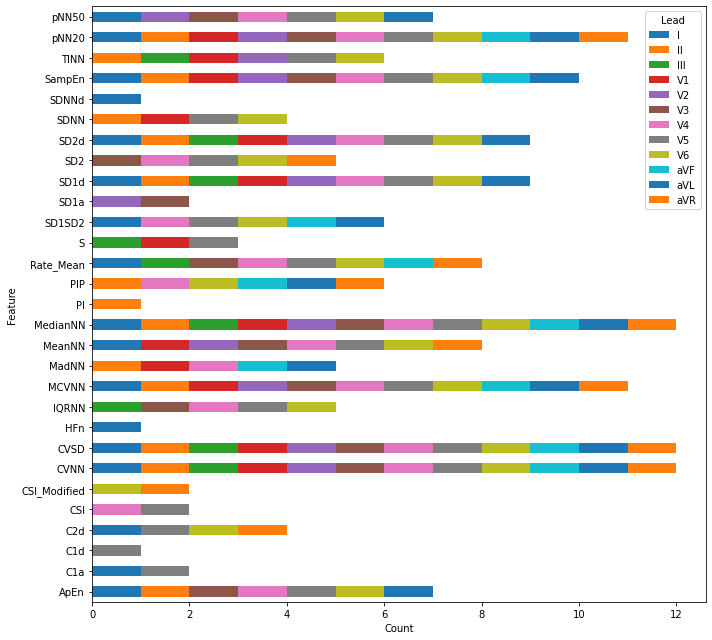

In [223]:
feat_dict = get_raw_feat_lead_categories(top_1000_important_features)
counter = Counter(feat_dict["Category"])
print(counter, sum(counter.values()))
feat_df = pd.DataFrame(feat_dict)

# print(feat_df[feat_df["Category"] == "Heart Rate Variability"])
hrv_df = feat_df[feat_df["Category"] == "Heart Rate Variability"]
hrv_df = hrv_df.groupby(["Feature", "Lead"]).size()\
    .reset_index()\
    .pivot(columns="Lead", index="Feature", values=0)

fig, ax = plt.subplots(figsize=(10, 9))
hrv_df.plot(kind="barh", stacked=True, ax=ax)
plt.xlabel("Count")
plt.tight_layout()
plt.savefig("heart-rate-variability_top_1000_features_category_lead.pdf", dpi=300)

In [195]:
def get_feat_lead_categories(features):
    df_dict = {
        "Lead": [],
        "Category": [],
        "Feature": [],
    }
    for feature in features:
        splits = feature.split("_")
        if feature in ("age", "sex"):
            # ignore
            continue
        assert splits[0] in LEADS, f"Invalid feature: {feature}"
        lead = splits[0]
        if splits[1] == "hb":
            category = "Heartbeat"
        elif splits[1] == "sig":
            category = "Full Waveform"
        else:
            # ignore
            category = "Heart Rate Variability"
            continue
        feature = "_".join(splits[2:])
        
        # feature transformation to nice figure...
        if feature.startswith("_skewness"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L708
            feature = "Skewness"
        elif feature.startswith("_c3"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1493
            feature = "C3"
        elif feature.startswith("_range_count"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1910
            feature = "Range Count"
        elif feature.startswith("_absolute_sum_of_changes"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L741
            feature = "Absolute Sum of Changes"
        elif feature.startswith("_change_quantiles"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1406
            feature = "Change Quantiles"
        elif feature.startswith("_length"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L649
            feature = "Length"
        elif feature.startswith("_cid_ce"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L529
            feature = "CID CE"
        elif feature.startswith("_agg_linear_trend"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L2015
            feature = "Aggregate Linear Trend"
        elif feature.startswith("_autocorrelation"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1778
            feature = "Autocorrelation"
        elif feature.startswith("_fft_coefficient"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1012
            feature = "FFT Coefficient"
        elif feature.startswith("_spkt_welch_density"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1320
            feature = "Spectral Welch Density"
        elif feature.startswith("_ar_coefficient"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1353
            feature = "Autoregressive Coefficient"
        elif feature.startswith("_last_location_of_minimum"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L816
            feature = "Last Location of Minimum"
        elif feature.startswith("_minimum"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1876
            feature = "Minimum"
        elif feature.startswith("_first_location_of_minimum"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L862
            feature = "First Location of Minimum"
        elif feature.startswith("_quantile"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1822
            feature = "Quantile"
        elif feature.startswith("_number_crossing_m"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1839
            feature = "Number Crossing 'M'"
        elif feature.startswith("_energy_ratio_by_chunks"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L2068
            feature = "Energy Ratio by Chunks"
        elif feature.startswith("_approximate_entropy"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1622
            feature = "Approximate Entropy"
        elif feature.startswith("_linear_trend"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1247
            feature = "Linear Trend"
        elif feature.startswith("_number_peaks"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1162
            feature = "Number Peaks"
        elif feature.startswith("_count_below_mean"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L802
            feature = "Count Below Mean"
        elif feature.startswith("_symmetry_looking"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L274
            feature = "Symmetrical Looking"
        elif feature.startswith("_time_reversal_asymmetry_statistic"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1452
            feature = "Time Reversal Asymmetry"
        elif feature.startswith("_abs_energy"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L510
            feature = "Absolute Energy"
        elif feature.startswith("_sample_entropy"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1568
            feature = "Sample Entropy"
        elif feature.startswith("_agg_autocorrelation"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L360
            feature = "Aggregate Autocorrelation"
        elif feature.startswith("_longest_strike_below_mean"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L758
            feature = "Longest Strike Below Mean"
        elif feature.startswith("_maximum"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1862
            feature = "Maximum"
        elif feature.startswith("_longest_strike_above_mean"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L773
            feature = "Longest Strike Above Mean"
        elif feature.startswith("_number_cwt_peaks"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1230
            feature = "Number of CWT Peaks"
        elif feature.startswith("_variance"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L694
            feature = "Variance"
        elif feature.startswith("_count_below"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L2161
            feature = "Count Below 't'"
        elif feature.startswith("_last_location_of_maximum"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L816
            feature = "Last Location of Maximum"
        elif feature.startswith("_ratio_beyond_r_sigma"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L232
            feature = "Ratio Beyond r sigma"
        elif feature.startswith("_index_mass_quantile"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1202
            feature = "Index Mass Quantile"
        elif feature.startswith("_partial_autocorrelation"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L406
            feature = "Partial Autocorrelation"
        elif feature.startswith("_binned_entropy"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1533
            feature = "Binned Entropy"
        elif feature.startswith("_friedrich_coefficients"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1927
            feature = "Friedrich Coefficients"
        elif feature.startswith("_count_above_mean"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L788
            feature = "Count Above Mean"
        elif feature.startswith("_first_location_of_maximum"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L831
            feature = "First Location of Maximum"
        elif feature.startswith("_median"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L621
            feature = "Median"
        elif feature.startswith("_cwt_coefficients"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L1272
            feature = "CWT Coefficients"
        elif feature.startswith("_standard_deviation"):
            # https://github.com/blue-yonder/tsfresh/blob/c071fd8f10e6e646ecff9e57b01e5a6533911f83/tsfresh/feature_extraction/feature_calculators.py#L663
            feature = "Standard Deviation"

        df_dict["Lead"].append(lead)
        df_dict["Category"].append(category)
        df_dict["Feature"].append(feature)
    return df_dict


In [196]:
feat_df_dict = get_feat_lead_categories(top_1000_important_features)
# [feat for feat in feat_df_dict["Feature"] if feat.startswith("_")]
feat_df = pd.DataFrame(feat_df_dict)
feat_df

,Lead,Category,Feature
0,V1,Full Waveform,Skewness
1,aVF,Full Waveform,C3
2,V4,Heartbeat,Range Count
3,I,Heartbeat,Absolute Sum of Changes
4,aVF,Heartbeat,C3
...,...,...,...
822,V4,Full Waveform,Autoregressive Coefficient
823,aVR,Heartbeat,FFT Coefficient
824,II,Heartbeat,Minimum
825,V6,Full Waveform,Number of CWT Peaks


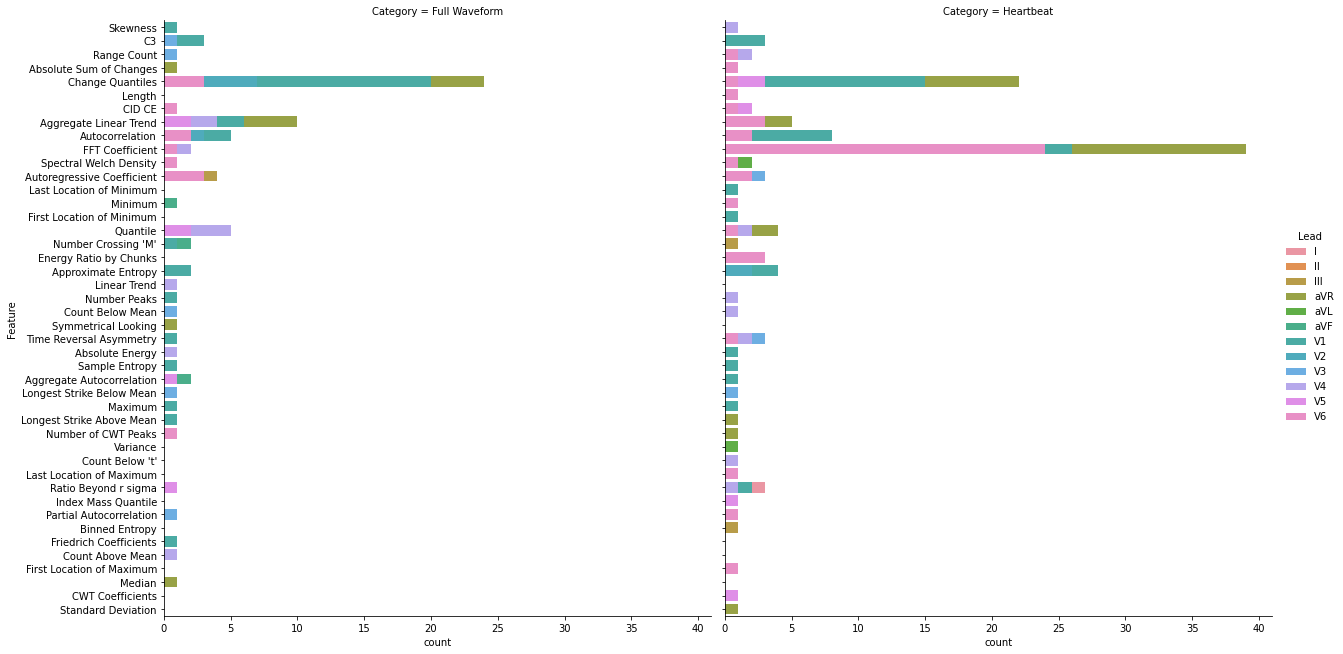

In [197]:
# fig, ax = plt.subplots(figsize=(16, 9))
# sns.countplot(data=feat_df[feat_df["Category"] == "Full Waveform"], hue="Lead", y="Feature", dodge=False, hue_order=LEADS, ax=ax)
sns.catplot(data=feat_df, hue="Lead", y="Feature", col="Category", kind="count", dodge=False, hue_order=LEADS, height=9)
plt.savefig("tsfresh_top_1000_features_category_lead.pdf", dpi=300)

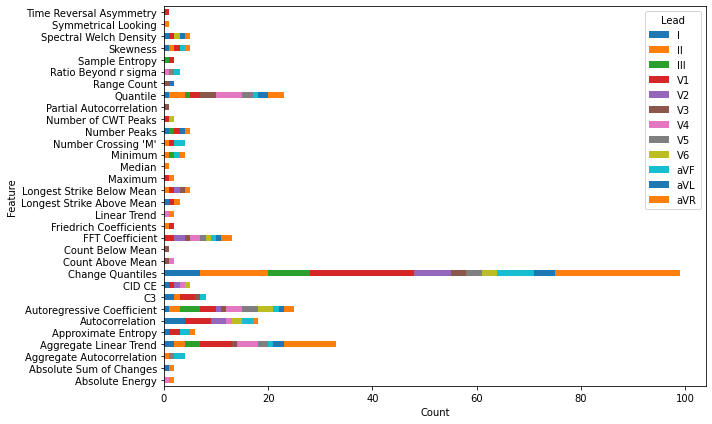

In [221]:

fwf_df = feat_df[feat_df["Category"] == "Full Waveform"]
fwf_df = fwf_df.groupby(["Feature", "Lead"]).size()\
    .reset_index()\
    .pivot(columns="Lead", index="Feature", values=0)

fig, ax = plt.subplots(figsize=(10, 6))
fwf_df.plot(kind="barh", stacked=True, ax=ax)
plt.xlabel("Count")
plt.tight_layout()
plt.savefig("full-waveform_top_1000_features_category_lead.pdf", dpi=300)

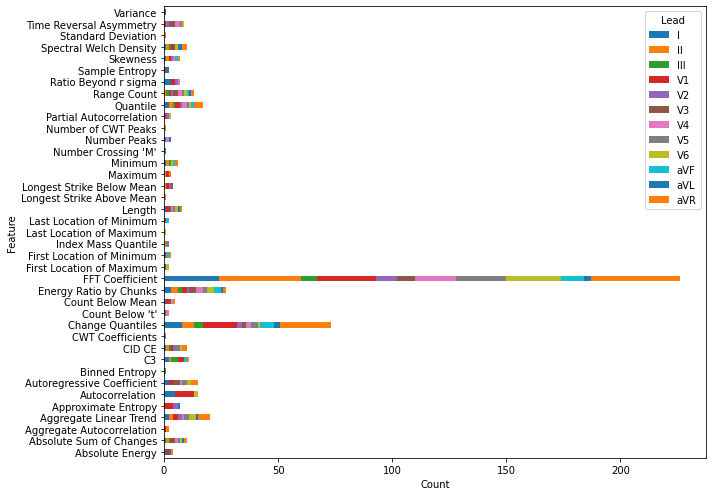

In [222]:

hb_df = feat_df[feat_df["Category"] == "Heartbeat"]
hb_df = hb_df.groupby(["Feature", "Lead"]).size()\
    .reset_index()\
    .pivot(columns="Lead", index="Feature", values=0)

fig, ax = plt.subplots(figsize=(10, 7))
hb_df.plot(kind="barh", stacked=True, ax=ax)
plt.xlabel("Count")
plt.tight_layout()
plt.savefig("heartbeat_top_1000_features_category_lead.pdf", dpi=300)